In [24]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import scipy.linalg as la
import pickle
# import winsound

In [3]:
from fbpconvnet import *
from train import *

In [4]:
fbpcnn = fbpconvnet()

X_train, X_test, E_train, E_test = load_dataset(100, 5, which='ellipses')

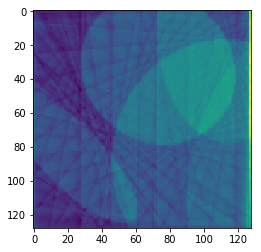

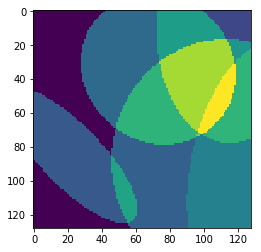

In [5]:
plt.figure(1);plt.imshow(X_train[0,:,:,0])
plt.figure(2);plt.imshow(E_train[0,:,:,0])

In [11]:
fbpcnn.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.00003), 
#               loss='mean_squared_error',#euclidean_loss,
              loss=euclidean_loss,
#               metrics=['mean_squared_error'])
              metrics=[euclidean_loss])
fbpcnn.fit(X_train, E_train,
          validation_split = 0.3,
          batch_size=1,
          epochs=100)
# duration = 1000  # millisecond
# freq = 440  # Hz
# winsound.Beep(freq, duration)

Train on 70 samples, validate on 30 samples
Epoch 1/100
70/70 [==============================] - 2s 25ms/step - loss: 4.2632 - euclidean_loss: 4.2632 - val_loss: 5.6423 - val_euclidean_loss: 5.6423
Epoch 2/100
70/70 [==============================] - 1s 11ms/step - loss: 4.2542 - euclidean_loss: 4.2542 - val_loss: 5.6425 - val_euclidean_loss: 5.6425
Epoch 3/100
70/70 [==============================] - 1s 10ms/step - loss: 4.2436 - euclidean_loss: 4.2436 - val_loss: 5.6674 - val_euclidean_loss: 5.6674
Epoch 4/100
70/70 [==============================] - 1s 10ms/step - loss: 4.2587 - euclidean_loss: 4.2587 - val_loss: 5.6475 - val_euclidean_loss: 5.6475
Epoch 5/100
70/70 [==============================] - 1s 11ms/step - loss: 4.2375 - euclidean_loss: 4.2375 - val_loss: 5.6450 - val_euclidean_loss: 5.6450
Epoch 6/100
70/70 [==============================] - 1s 10ms/step - loss: 4.2422 - euclidean_loss: 4.2422 - val_loss: 5.6470 - val_euclidean_loss: 5.6470
Epoch 7/100
70/70 [=============

70/70 [==============================] - 1s 10ms/step - loss: 4.2198 - euclidean_loss: 4.2198 - val_loss: 5.6447 - val_euclidean_loss: 5.6447
Epoch 54/100
70/70 [==============================] - 1s 10ms/step - loss: 4.2153 - euclidean_loss: 4.2153 - val_loss: 5.6559 - val_euclidean_loss: 5.6559
Epoch 55/100
70/70 [==============================] - 1s 10ms/step - loss: 4.1984 - euclidean_loss: 4.1984 - val_loss: 5.7012 - val_euclidean_loss: 5.7012
Epoch 56/100
70/70 [==============================] - 1s 10ms/step - loss: 4.1965 - euclidean_loss: 4.1965 - val_loss: 5.6460 - val_euclidean_loss: 5.6460
Epoch 57/100
70/70 [==============================] - 1s 11ms/step - loss: 4.2008 - euclidean_loss: 4.2008 - val_loss: 5.6988 - val_euclidean_loss: 5.6988
Epoch 58/100
70/70 [==============================] - 1s 10ms/step - loss: 4.2182 - euclidean_loss: 4.2182 - val_loss: 5.6492 - val_euclidean_loss: 5.6492
Epoch 59/100
70/70 [==============================] - 1s 10ms/step - loss: 4.2009 -

In [12]:
X_recon = fbpcnn.predict(X_test)
test_loss, test_acc = fbpcnn.evaluate(X_recon, E_test)
print(test_loss, test_acc)

5/5 [==============================] - 0s 2ms/step
7.384300231933594 7.384300231933594


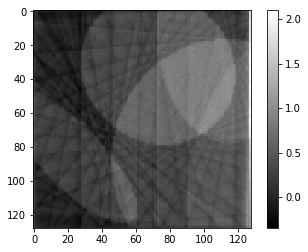

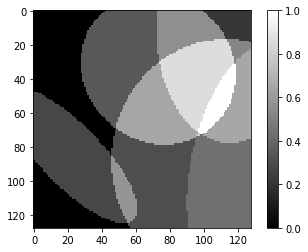

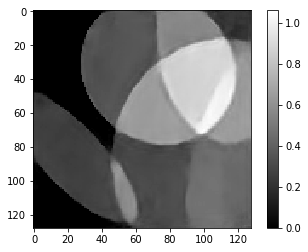

In [14]:
X_recon = fbpcnn.predict(X_train)
plt.figure(1);plt.imshow(X_train[0,:,:,0], cmap='gray');plt.colorbar()
plt.figure(2);plt.imshow(E_train[0,:,:,0], cmap='gray');plt.colorbar()
plt.figure(3);plt.imshow(X_recon[0,:,:,0], cmap='gray');plt.colorbar()

# X_recon_edit = (X_recon-1.5)*(X_recon>=1.5)
# plt.figure(3);plt.imshow(X_recon_edit[1,:,:,0], cmap='gray');plt.colorbar()

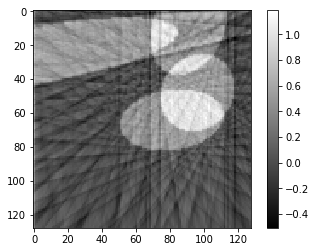

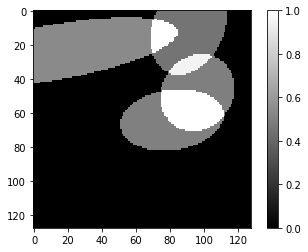

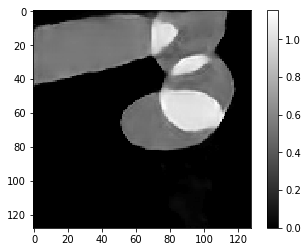

In [15]:
X_recon = fbpcnn.predict(X_test)
plt.figure(1);plt.imshow(X_test[0,:,:,0], cmap='gray');plt.colorbar()
plt.figure(2);plt.imshow(E_test[0,:,:,0], cmap='gray');plt.colorbar()
plt.figure(3);plt.imshow(X_recon[0,:,:,0], cmap='gray');plt.colorbar()

# X_recon_edit = (X_recon-1.5)*(X_recon>=1.5)
# plt.figure(3);plt.imshow(X_recon_edit[1,:,:,0], cmap='gray');plt.colorbar()

In [16]:
la.norm(E_train[0,:,:,0].flatten() - X_train[0,:,:,0].flatten())

17.68470531789343

In [18]:
X_recon = fbpcnn.predict(X_test)

In [19]:
la.norm(E_test[0,:,:,0].flatten() - X_test[0,:,:,0].flatten())

13.783098670341587

In [20]:
la.norm(E_test[0,:,:,0].flatten() - X_recon[0,:,:,0].flatten())

7.575236897099091

In [22]:
fbpcnn.save_weights('small_dset_no_dropout.h5')

In [36]:
with open('/home/varun/fbpconvnet/datasets/Ellipses_X_train100.pickle', 'wb') as output:
    pickle.dump(X_train, output)
with open('/home/varun/fbpconvnet/datasets/Ellipses_X_train100.pickle', 'rb') as data:
    print(np.allclose(X_train, pickle.load(data)))
    
with open('/home/varun/fbpconvnet/datasets/Ellipses_E_train100.pickle', 'wb') as output:
    pickle.dump(E_train, output)
with open('/home/varun/fbpconvnet/datasets/Ellipses_E_train100.pickle', 'rb') as data:
    print(np.allclose(E_train, pickle.load(data)))
    
with open('/home/varun/fbpconvnet/datasets/Ellipses_X_test5.pickle', 'wb') as output:
    pickle.dump(X_test, output)
with open('/home/varun/fbpconvnet/datasets/Ellipses_X_test5.pickle', 'rb') as data:
    print(np.allclose(X_test, pickle.load(data)))

with open('/home/varun/fbpconvnet/datasets/Ellipses_E_test5.pickle', 'wb') as output:
    pickle.dump(E_test, output)
with open('/home/varun/fbpconvnet/datasets/Ellipses_E_test5.pickle', 'rb') as data:
    print(np.allclose(E_test, pickle.load(data)))


True
True
True
True


In [34]:
X_test.shape

(5, 128, 128, 1)

In [30]:
np.allclose(dataset, X_train)

True